In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Utilities
def loss(y, y_hat):
    # binary cross entropy
    return  np.sum(- (y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(x,0)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def binary_xent_residual(y, y_hat):
    # dL_dYhat
    return (y/y_hat - (1-y)/(1-y_hat))

In [6]:
class MLP:
  """
  Multilayer Perceptron (ANN with single hidden layer) 
  This output layer of this network is specified for binary classification
  and crossentropy loss. 
  """
  def __init__(self, n_input, n_hidden):
    self.n_input = n_input
    self.n_hidden = n_hidden
    self._initialize_weights()

  def predict(self, x):
    h = relu(np.dot(x,self.W) + self.b)
    y_hat = sigmoid(np.dot(h, self.v) + self.c)
    return y_hat

  def fit(self, x, y, learning_rate=1e-2, iterations=1000):
    losses = [loss(y, self.predict(x))]
    
    # gradient descent loop
    for i in range(iterations):
        dL_dw, dL_db, dL_dv, dL_dc = self._grad_f(x, y)
        self.W -= learning_rate * dL_dw
        self.b -= learning_rate * dL_db
        self.v -= learning_rate * dL_dv
        self.c -= learning_rate * dL_dc

        losses.append(loss(y, self.predict(x)))
    return losses

  def _grad_f(self, x, y):
    # forward pass
    a = np.dot(x,self.W) + self.b
    h = relu(a)
    y_a = np.dot(h, self.v) + self.c
    y_hat = sigmoid(y_a)
    
    # backward pass
    dL_dc =  - binary_xent_residual(y, y_hat).dot( y_hat*(1-y_hat) ) / len(y)
    dL_dv = - (binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)).T.dot(h) / len(y)
    dL_db = - ((binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)).T.dot(relu_derivative(a))*self.v) / len(y)
    dL_dw = - x.T.dot(np.expand_dims((binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)),1).dot(np.expand_dims(self.v,1).T)) / len(y)
             
    return [dL_dw, dL_db, dL_dv, dL_dc]

  def _initialize_weights(self):
    self.W = np.random.randn(self.n_hidden*self.n_input).reshape(((self.n_input,self.n_hidden)))
    self.b = np.random.randn(self.n_hidden)
    self.v = np.random.randn(self.n_hidden)
    self.c = np.random.randn(1)


In [7]:
model = MLP(n_input=2, n_hidden=10)

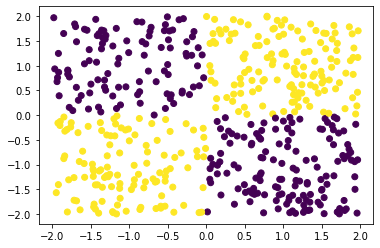

In [8]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)

In [9]:
history = model.fit(x,y, iterations=5000)

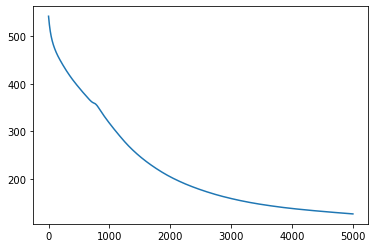

In [10]:
plt.plot(history)

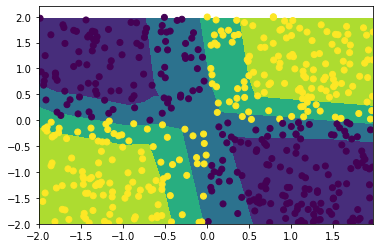

In [11]:
# Visualize model's prediction surface

delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)
YHAT = model.predict(np.array((X1.ravel(),X2.ravel())).T).reshape((160,160))
fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, YHAT, levels=[0, .25, .5, .75, 1.0])
plt.scatter(x[:,0],x[:,1],c=y)

How would you generalize this class? Things we would need to add:
 * More flexibility about the activation functions
 * More flexibility about the output layer and activations
 * Multiple hidden layers